Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


C:\Users\D.SriSurya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\D.SriSurya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


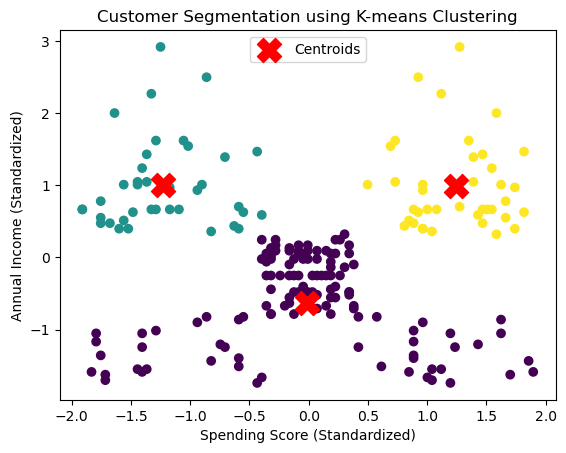

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0              62.0  40.325203           44.154472               49.829268
1             162.0  40.394737           87.000000               18.631579
2             162.0  32.692308           86.538462               82.128205


C:\Users\D.SriSurya\AppData\Local\Temp\ipykernel_20512\2074077931.py:41: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = df.groupby('Cluster').mean()


In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your mall customers dataset
# Replace 'your_dataset.csv' with the actual path or URL of your dataset
# Import the dataset
# Import the dataset
df = pd.read_csv(r'C:\Users\D.SriSurya\Desktop\Er.D.Sri Surya\6thsem\internship\Mall_Customers.csv')

# Print the columns to check their names
print(df.columns)

# Assuming your dataset has columns like 'Spending Score (1-100)', 'Annual Income (k$)', etc.
# Extract relevant features for clustering
features = df[['Spending Score (1-100)', 'Annual Income (k$)']]

# Standardize the features to have zero mean and unit variance
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Choose the number of clusters (you may adjust this based on your analysis)
num_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Visualize the clusters
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=df['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, marker='X', c='red', label='Centroids')
plt.xlabel('Spending Score (Standardized)')
plt.ylabel('Annual Income (Standardized)')
plt.title('Customer Segmentation using K-means Clustering')
plt.legend()
plt.show()

# Explore the characteristics of each cluster
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)
